## 결정 트리

In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target)

In [3]:
dtc = DecisionTreeClassifier()
# DecisionTreeClassifier 학습
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

 ### Setting - MAC
 1. brew install graphviz
 2. (Conda or Main) pip install graphviz

In [4]:
export_graphviz(dtc, out_file="tree.dot", class_names=iris_data.target_names, feature_names= iris_data.feature_names, impurity=True, filled=True)

In [5]:
import graphviz


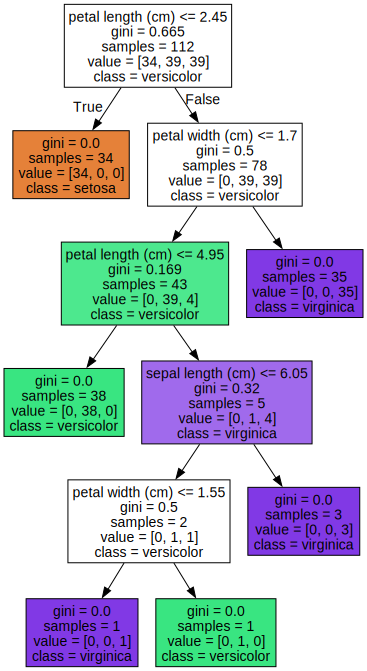

In [6]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 트리 설명
1. samples: 전체 데이터 개수
2. value: 데이터 구성 / [36, 42, 34]는 Setosa 36개, Versicolor 42개, Virginica 34개로 구성됨을 의미
3. sample 112개가 value = [36, 42, 34] 분포도로 되어 있으므로 지니 계수는 0.664
4. petal length (cm) <= 0.75 규칙으로 자식 노드 생성
5. class = Versicolor는 하위 노드를 가질 경우에 Versicolor의 개수가 42개로 가장 많다는 것을 의미

### 지니 계수

In [7]:
import gini2

print(gini2.gini2([33,40,39]))
print(gini2.gini2([36,42,34]))

0.6643813775510204
0.6639030612244898


### max_depth

In [8]:
dtc = DecisionTreeClassifier(max_depth=3)
# DecisionTreeClassifier 학습
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
export_graphviz(dtc, out_file="max_depth_cla.dot", class_names=iris_data.target_names, 
                feature_names= iris_data.feature_names, impurity=True, filled=True)

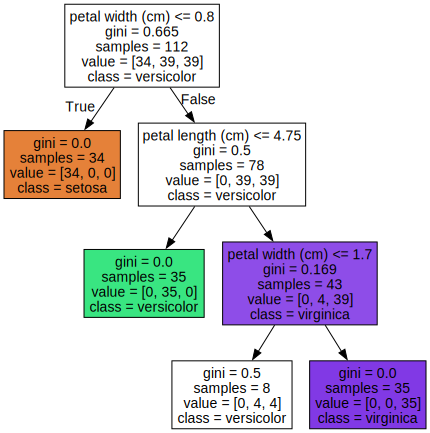

In [10]:
with open("max_depth_cla.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [11]:
export_graphviz(dtc, out_file="max_depth.dot", class_names=iris_data.target_names, 
                feature_names= iris_data.feature_names, impurity=True, filled=True, max_depth=3)

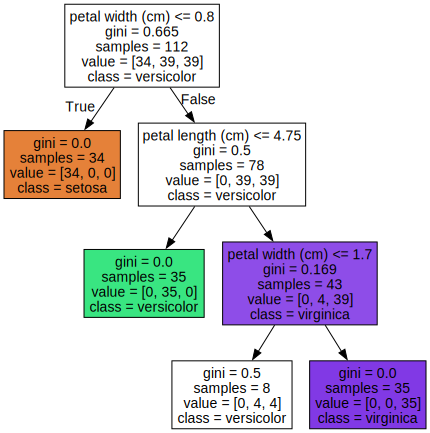

In [12]:
with open("max_depth.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### min_samples_split

In [13]:
dtc = DecisionTreeClassifier(min_samples_split=4)
# DecisionTreeClassifier 학습
dtc.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=4)

In [14]:
export_graphviz(dtc, out_file="min_samples_split.dot", class_names=iris_data.target_names, 
                feature_names= iris_data.feature_names, impurity=True, filled=True)

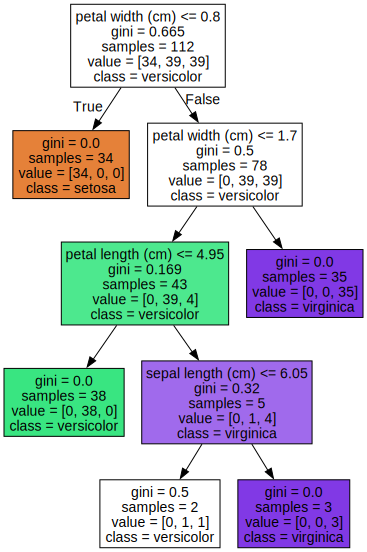

In [15]:
with open("min_samples_split.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### min_samples_leaf
#### 노드가 분할할 경우 Left, Right의 child 중 하나라도 min_sample_leafs로 지정된 최소 데이터 건수보다 더 작은 샘플 데이터 건수를 가지면, 해당 노드는 더 이상 문할하지 않고 리프 노트로 변환

In [16]:
dtc = DecisionTreeClassifier(min_samples_leaf=4)
# DecisionTreeClassifier 학습
dtc.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4)

In [17]:
export_graphviz(dtc, out_file="min_samples_leaf.dot", class_names=iris_data.target_names, 
                feature_names= iris_data.feature_names, impurity=True, filled=True)

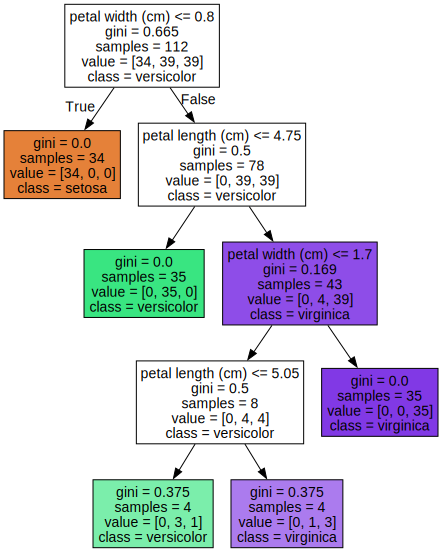

In [18]:
with open("min_samples_leaf.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature Importance

In [19]:
# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dtc.feature_importances_, 3)))

Feature importances:
[0.    0.    0.458 0.542]


In [20]:
# feature별 importance mapping
for name, value in zip(iris_data.feature_names, dtc.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.458
petal width (cm) : 0.542


<Axes: >

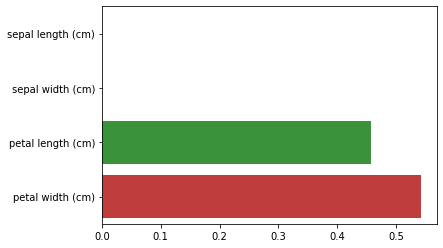

In [21]:
sns.barplot(x=dtc.feature_importances_, y = iris_data.feature_names)

In [22]:
# 여러 features 중 petal_length가 가장 피처 중요도가 높음을 알 수 있음

## 결정 트리 과적합(Overfitting)

In [23]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

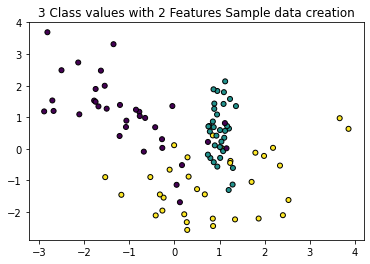

In [24]:
plt.title("3 Class values with 2 Features Sample data creation")

x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                            n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(x_features[:,0], x_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

### 결정 경계 시각화

In [25]:
import visualize_boundary

/Users/bongeungu/Desktop/kfq/python/machine/MachineLearning/MachineLearning_Class/visualize_boundary.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


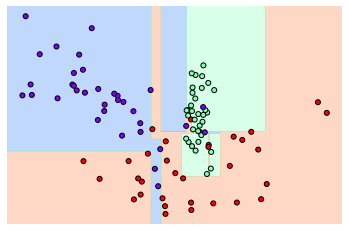

In [26]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(x_features, y_labels)
visualize_boundary.visualize_boundary(dt_clf, x_features, y_labels)

#### min_samples_leaf로 트리 생성 조건을 제약한 결정 경계 시각화

/Users/bongeungu/Desktop/kfq/python/machine/MachineLearning/MachineLearning_Class/visualize_boundary.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


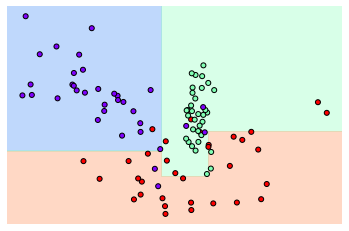

In [27]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(x_features, y_labels)
visualize_boundary.visualize_boundary(dt_clf, x_features, y_labels)